In [0]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import random

from google.colab import drive, files
drive.mount('/content/gdrive/')
path = '/content/gdrive/My Drive/np_arrays/datasets/'
models_path = '/content/gdrive/My Drive/np_arrays/models/'
data_path = '/content/gdrive/My Drive/np_arrays/datasets/'

Using TensorFlow backend.


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

50000
10000
50000
10000


In [0]:
print(y_train[0])

[6]


In [0]:
print(y_train[1]-1)

[8]


In [0]:
def setMaker(trainset, traintype, testset, testtype, index):
  j = 0
  i = 0
  while( i < 50000 and j != 4800): 
    if (y_train[i] == index): #train set oluşturuluyor
      trainset.append(x_train[i])
      if (y_train[i] == 7):
        traintype.append(y_train[27]) #5
      elif (y_train[i] == 9):
        traintype.append(y_train[0]) #6
      else:
        traintype.append(y_train[i] - 1)
      j = j + 1
    i = i + 1

  while( i < 50000 and j != 5000): 
    if (y_train[i] == index): #test set oluşturuluyor
      testset.append(x_train[i])
      if (y_train[i] == 7):
        testtype.append(y_train[27]) #5
      elif (y_train[i] == 9):
        testtype.append(y_train[0]) #6
      else:
        testtype.append(y_train[i] - 1)
      j = j + 1
    i = i + 1

  i = 0
  j = 0
  while( i < 10000 and j != 1000):
    if (y_test[i] == index): #test set oluşturuluyor
      testset.append(x_test[i])
      if (y_test[i] == 7):
        testtype.append(y_train[27]) #5
      elif (y_test[i] == 9):
        testtype.append(y_train[0]) #6
      else:
        testtype.append(y_test[i] - 1)
      j = j + 1
    i = i + 1

In [0]:
#Train Matrisi yap #datasetten belli labeldeki şeyleri çekmek
trainset = []
traintype = []
testset = []
testtype = []

setMaker(trainset, traintype, testset, testtype, 1) #automobile
setMaker(trainset, traintype, testset, testtype, 2) #bird
setMaker(trainset, traintype, testset, testtype, 3) #cat
setMaker(trainset, traintype, testset, testtype, 4) #deer
setMaker(trainset, traintype, testset, testtype, 5) #dog
setMaker(trainset, traintype, testset, testtype, 7) #horse
setMaker(trainset, traintype, testset, testtype, 9) #truck

In [0]:
print(len(trainset))
print(len(traintype))
print(len(testset))
print(len(testtype))

33600
33600
8400
8400


Text(0.5, 1.0, '6')

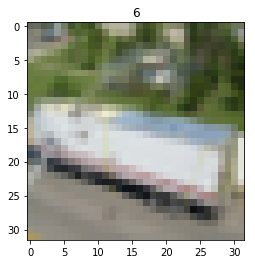

In [0]:
i = 33599
rgb = trainset[i] #Visualize image and label
plt.imshow(rgb)
plt.title(int(traintype[i]))


Text(0.5, 1.0, '2')

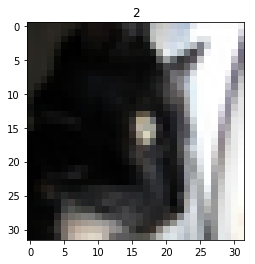

In [0]:
i = 2400
rgb = testset[i] #Visualize image and label
plt.imshow(rgb)
plt.title(int(testtype[i]))

In [0]:
testtype[:15]

[array([1]),
 array([0]),
 array([6], dtype=uint8),
 array([5], dtype=uint8),
 array([2], dtype=uint8),
 array([0]),
 array([0]),
 array([6], dtype=uint8),
 array([1]),
 array([2]),
 array([5], dtype=uint8),
 array([0]),
 array([1], dtype=uint8),
 array([2]),
 array([2])]

In [0]:
#Train set icin shuffle islemleri
combined = list(zip(trainset, traintype))
random.shuffle(combined)

trainset[:], traintype[:] = zip(*combined)

In [0]:
#Test set icin shuffle islemleri
combined = list(zip(testset, testtype))
random.shuffle(combined)

testset[:], testtype[:] = zip(*combined)

In [0]:
np.save(data_path + "trainset_karma2", trainset)
np.save(data_path + "traintype_karma2", traintype)
np.save(data_path + "testset_karma2", testset)
np.save(data_path + "testtype_karma2", testtype)